# Data Analysis

In [434]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [435]:
df_clubs_overview = pd.read_pickle("./df_clubs_overview.pkl")
df_matchday_data = pd.read_pickle("./df_matchday_data.pkl")
df_transfer_data = pd.read_pickle("./df_transfer_data.pkl")

# Clubs data

In [436]:
df_clubs_overview 

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Schalke 04,19,"24,8",0,-,-,1963
1,Preußen Münster,19,"25,7",0,-,-,1963
2,1.FC Saarbrücken,18,"24,5",0,-,-,1963
3,Hamburger SV,22,"25,4",0,-,-,1963
4,1.FC Kaiserslautern,19,"25,0",1,-,-,1963
...,...,...,...,...,...,...,...
13,1.FC Köln,39,"24,9",15,"2,97 Mio. €","115,65 Mio. €",2022
14,Hertha BSC,41,"25,4",21,"2,29 Mio. €","94,00 Mio. €",2022
15,SV Werder Bremen,33,"24,7",10,"2,71 Mio. €","89,50 Mio. €",2022
16,FC Schalke 04,43,"26,4",22,"2,04 Mio. €","87,78 Mio. €",2022


In [437]:
df_clubs = df_clubs_overview.loc[~df_clubs_overview.apply(lambda row: row.astype(str).str.contains('-').any(), axis=1)]

In [438]:
df_clubs

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,FC Bayern München,29,"27,6",14,"6,04 Mio. €","175,30 Mio. €",2004
1,SV Werder Bremen,29,"25,0",14,"3,40 Mio. €","98,48 Mio. €",2004
2,Bayer 04 Leverkusen,32,"24,8",15,"2,72 Mio. €","86,93 Mio. €",2004
3,FC Schalke 04,33,"25,6",15,"2,62 Mio. €","86,33 Mio. €",2004
4,VfB Stuttgart,31,"25,5",14,"2,56 Mio. €","79,50 Mio. €",2004
...,...,...,...,...,...,...,...
13,1.FC Köln,39,"24,9",15,"2,97 Mio. €","115,65 Mio. €",2022
14,Hertha BSC,41,"25,4",21,"2,29 Mio. €","94,00 Mio. €",2022
15,SV Werder Bremen,33,"24,7",10,"2,71 Mio. €","89,50 Mio. €",2022
16,FC Schalke 04,43,"26,4",22,"2,04 Mio. €","87,78 Mio. €",2022


In [439]:
print(df_clubs['CLUB_NAME'].unique().tolist())
print(len(df_clubs['CLUB_NAME'].unique().tolist()))

['FC Bayern München', 'SV Werder Bremen', 'Bayer 04 Leverkusen', 'FC Schalke 04', 'VfB Stuttgart', 'Borussia Dortmund', 'Hertha BSC', 'Hamburger SV', 'VfL Wolfsburg', 'Borussia Mönchengladbach', 'Hannover 96', '1.FC Nürnberg', '1.FC Kaiserslautern', 'VfL Bochum', 'FC Hansa Rostock', 'Arminia Bielefeld', 'SC Freiburg', '1.FSV Mainz 05', '1.FC Köln', 'Eintracht Frankfurt', 'MSV Duisburg', 'Alemannia Aachen', 'FC Energie Cottbus', 'Karlsruher SC', 'TSG 1899 Hoffenheim', 'FC St. Pauli', 'FC Augsburg', 'SpVgg Greuther Fürth', 'Fortuna Düsseldorf', 'Eintracht Braunschweig', 'SC Paderborn 07', 'FC Ingolstadt 04', 'SV Darmstadt 98', 'RasenBallsport Leipzig', '1.FC Union Berlin']
35


In [442]:
mapping = {
    '1.FC Kaiserslautern': "1.FC K'lautern", 
    '1.FC Nürnberg':'1.FC Nürnberg', 
    '1.FSV Mainz 05':'1.FSV Mainz 05', 
    'Arminia Bielefeld':'Arm. Bielefeld', 
    'Bayer 04 Leverkusen':'B. Leverkusen',
    'FC Bayern München':'Bayern München',
    'Borussia Dortmund':'Bor. Dortmund', 
    'Borussia Mönchengladbach':"Bor. M'gladbach", 
    'FC Schalke 04':'FC Schalke 04', 
    'Hamburger SV':'Hamburger SV', 
    'Hannover 96':'Hannover 96', 
    'FC Hansa Rostock':'Hansa Rostock', 
    'Hertha BSC':'Hertha BSC', 
    'SC Freiburg':'SC Freiburg', 
    'VfB Stuttgart':'VfB Stuttgart', 
    'VfL Bochum': 'VfL Bochum', 
    'VfL Wolfsburg':'VfL Wolfsburg', 
    'SV Werder Bremen':'Werder Bremen', 
    '1.FC Köln':'1.FC Köln', 
    'Eintracht Frankfurt':'E. Frankfurt', 
    'MSV Duisburg':'MSV Duisburg', 
    'Alemannia Aachen':'Alem. Aachen', 
    'FC Energie Cottbus':'Energie Cottbus', 
    'Karlsruher SC':'Karlsruher SC', 
    'TSG 1899 Hoffenheim':'TSG Hoffenheim', 
    'FC St. Pauli':'FC St. Pauli', 
    'FC Augsburg':'FC Augsburg', 
    'Fortuna Düsseldorf':'F. Düsseldorf', 
    'SpVgg Greuther Fürth':'Greuther Fürth', 
    'Eintracht Braunschweig':'E. Braunschweig', 
    'SC Paderborn 07':'SC Paderborn', 
    'SV Darmstadt 98':'Darmstadt 98', 
    'FC Ingolstadt 04':'FC Ingolstadt', 
    'RasenBallsport Leipzig':'RB Leipzig', 
    '1.FC Union Berlin':'Union Berlin'
}
df_clubs = df_clubs.copy()
df_clubs['CLUB_NAME'] = df_clubs['CLUB_NAME'].map(mapping).fillna(df_clubs['CLUB_NAME'])

## Convert to numeric

In [443]:
print(df_clubs.dtypes)

CLUB_NAME             object
PLAYERS_COUNT         object
PLAYERS_AVG_AGE       object
LEGIONARIES_COUNT     object
AVG_MARKET_VALUE      object
TOTAL_MARKET_VALUE    object
season                object
dtype: object


In [444]:
def convert_market_value(value):
    try:
        # Entferne Kommas und ersetze sie durch Punkte
        value = value.replace(",", ".")
        
        # Millionen
        if "Mio. €" in value:
            value = value.replace("Mio. €", "")
            return float(value) * 1e6  # Multipliziere mit 1 Million

        # Tausend
        elif "Tsd. €" in value:
            value = value.replace("Tsd. €", "")
            return float(value) * 1e3  # Multipliziere mit 1 Tausend

        else:
            return None  # Falls die Konvertierung fehlschlägt, gebe None zurück

    except Exception as e:
        print(f"Konvertierungsfehler: {e}, Wert: {value}")
        return None  # Falls die Konvertierung fehlschlägt, gebe None zurück

df_clubs = df_clubs.copy()
df_clubs['AVG_MARKET_VALUE'] = df_clubs['AVG_MARKET_VALUE'].apply(convert_market_value)
df_clubs['TOTAL_MARKET_VALUE'] = df_clubs['TOTAL_MARKET_VALUE'].apply(convert_market_value)
print(df_clubs.dtypes)


CLUB_NAME              object
PLAYERS_COUNT          object
PLAYERS_AVG_AGE        object
LEGIONARIES_COUNT      object
AVG_MARKET_VALUE      float64
TOTAL_MARKET_VALUE    float64
season                 object
dtype: object


In [445]:
df_clubs

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,Bayern München,29,"27,6",14,6040000.0,175300000.0,2004
1,Werder Bremen,29,"25,0",14,3400000.0,98480000.0,2004
2,B. Leverkusen,32,"24,8",15,2720000.0,86930000.0,2004
3,FC Schalke 04,33,"25,6",15,2620000.0,86330000.0,2004
4,VfB Stuttgart,31,"25,5",14,2560000.0,79500000.0,2004
...,...,...,...,...,...,...,...
13,1.FC Köln,39,"24,9",15,2970000.0,115650000.0,2022
14,Hertha BSC,41,"25,4",21,2290000.0,94000000.0,2022
15,Werder Bremen,33,"24,7",10,2710000.0,89500000.0,2022
16,FC Schalke 04,43,"26,4",22,2040000.0,87780000.0,2022


In [446]:
print(df_clubs['AVG_MARKET_VALUE'] .isna().sum())

0


## Group club infos by club

In [447]:
df_clubs_grp_clubs = df_clubs.groupby('CLUB_NAME')
club_names_clubs = df_clubs['CLUB_NAME'].unique().tolist()
print(f'clubs: {len(club_names_clubs)}')

clubs: 35


In [448]:
dict_clubs_clubs = {}
for club_name, group_df in df_clubs_grp_clubs:
    dict_clubs_clubs[club_name] = group_df.reset_index(drop=True)

In [449]:
dict_clubs_clubs[club_names_clubs[0]]

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,Bayern München,29,"27,6",14,6040000.0,175300000.0,2004
1,Bayern München,28,"27,8",14,6350000.0,177880000.0,2005
2,Bayern München,30,"26,5",16,6020000.0,180730000.0,2006
3,Bayern München,31,"25,7",14,8040000.0,249200000.0,2007
4,Bayern München,29,"26,2",14,8140000.0,235950000.0,2008
5,Bayern München,29,"26,1",15,9640000.0,279550000.0,2009
6,Bayern München,31,"25,7",17,9970000.0,308980000.0,2010
7,Bayern München,25,"25,8",11,14240000.0,356000000.0,2011
8,Bayern München,29,"25,3",13,15940000.0,462400000.0,2012
9,Bayern München,33,"24,8",16,16880000.0,556880000.0,2013


In [450]:
# Anzahl der clubs
print(len(dict_clubs_clubs))

35


## Group club infos by season

In [451]:
df_clubs_grp_season = df_clubs.groupby('season')
season_names = df_clubs['season'].unique().tolist()

In [452]:
dict_clubs_season = {}
for season, group_df in df_clubs_grp_season:
    dict_clubs_season[season] = group_df.reset_index(drop=True)

In [453]:
dict_clubs_season[season_names[0]]

,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season
0,Bayern München,29,"27,6",14,6040000.0,175300000.0,2004
1,Werder Bremen,29,"25,0",14,3400000.0,98480000.0,2004
2,B. Leverkusen,32,"24,8",15,2720000.0,86930000.0,2004
3,FC Schalke 04,33,"25,6",15,2620000.0,86330000.0,2004
4,VfB Stuttgart,31,"25,5",14,2560000.0,79500000.0,2004
5,Bor. Dortmund,36,"24,5",18,2180000.0,78330000.0,2004
6,Hertha BSC,30,"26,3",14,2390000.0,71780000.0,2004
7,Hamburger SV,31,"24,9",16,2120000.0,65600000.0,2004
8,VfL Wolfsburg,28,"27,3",18,2120000.0,59300000.0,2004
9,Bor. M'gladbach,37,"27,2",19,1380000.0,50930000.0,2004


# Match data

In [454]:
df_matchday_data

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,1963-08-24,5,8,1963,1,Hertha BSC,14,1.FC Nürnberg,9,NaN,NaN,NaN,1.0,1.0,DRAW,Rolf Seekamp
1,1963-08-24,5,8,1963,1,Werder Bremen,10,Bor. Dortmund,4,NaN,NaN,NaN,3.0,2.0,HOME_WIN,Alfred Ott
2,1963-08-24,5,8,1963,1,E. Frankfurt,2,1.FC K'lautern,12,NaN,NaN,NaN,1.0,1.0,DRAW,Johannes Malka
3,1963-08-24,5,8,1963,1,Karlsruher SC,13,Meidericher SV,3,NaN,NaN,NaN,1.0,4.0,AWAY_WIN,Walter Zimmermann
4,1963-08-24,5,8,1963,1,1860 München,7,E. Braunschweig,11,NaN,NaN,NaN,1.0,1.0,DRAW,Helmut Fritz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz


In [455]:
df_matchday_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18262 entries, 0 to 8
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             18262 non-null  datetime64[ns]
 1   WEEKDAY          18262 non-null  int64         
 2   MONTH            18262 non-null  int64         
 3   SEASON           18262 non-null  int64         
 4   MATCHDAY         18262 non-null  int64         
 5   HOME_TEAM        18262 non-null  object        
 6   PLACE_HOME_TEAM  18262 non-null  object        
 7   AWAY_TEAM        18262 non-null  object        
 8   PLACE_AWAY_TEAM  18262 non-null  object        
 9   WIN_PERC_HOME    4284 non-null   float64       
 10  REMIS_PERC       4284 non-null   float64       
 11  WIN_PERC_AWAY    4284 non-null   float64       
 12  HOME_GOALS       18262 non-null  float64       
 13  AWAY_GOALS       18262 non-null  float64       
 14  RESULT           18262 non-null  object   

In [456]:
df_matchday = df_matchday_data[df_matchday_data['SEASON'] >= 2004]

In [457]:
df_matchday

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann
1,2004-08-07,5,8,2004,1,1.FC K'lautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner
2,2004-08-07,5,8,2004,1,SC Freiburg,18,Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer
3,2004-08-07,5,8,2004,1,Bor. Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark
4,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz


## Efficiency (Points/TOTAL_MARKET_VALUE)

In [458]:
# Punkte für jedes Spiel berechnen
def calculate_points(row):
    if row['HOME_GOALS'] > row['AWAY_GOALS']:
        return row['HOME_TEAM'], 3, row['AWAY_TEAM'], 0
    elif row['HOME_GOALS'] < row['AWAY_GOALS']:
        return row['HOME_TEAM'], 0, row['AWAY_TEAM'], 3
    else:
        return row['HOME_TEAM'], 1, row['AWAY_TEAM'], 1

df_matchday = df_matchday.copy()
df_matchday[['HOME_TEAM', 'HOME_POINTS', 'AWAY_TEAM', 'AWAY_POINTS']] = df_matchday.apply(calculate_points, axis=1, result_type="expand")


In [459]:
df_matchday

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_POINTS,AWAY_POINTS
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,3,0
1,2004-08-07,5,8,2004,1,1.FC K'lautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner,0,3
2,2004-08-07,5,8,2004,1,SC Freiburg,18,Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer,1,1
3,2004-08-07,5,8,2004,1,Bor. Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark,0,3
4,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck,3,0
5,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin,3,0
6,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus,0,3
7,2023-05-27,5,5,2022,34,VfL Bochum,16,B. Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz,3,0


In [460]:
# Saisonweise Punkte für jeden Verein aggregieren
home = df_matchday.groupby(['SEASON', 'HOME_TEAM'])['HOME_POINTS'].sum().reset_index()
away = df_matchday.groupby(['SEASON', 'AWAY_TEAM'])['AWAY_POINTS'].sum().reset_index()

home.rename(columns={'HOME_TEAM': 'CLUB', 'HOME_POINTS': 'POINTS'}, inplace=True)
away.rename(columns={'AWAY_TEAM': 'CLUB', 'AWAY_POINTS': 'POINTS'}, inplace=True)

total_points = pd.concat([home, away]).groupby(['SEASON', 'CLUB'])['POINTS'].sum().reset_index()
clubs = total_points['CLUB'].unique().tolist()
print(clubs)
print(len(clubs))

["1.FC K'lautern", '1.FC Nürnberg', '1.FSV Mainz 05', 'Arm. Bielefeld', 'B. Leverkusen', 'Bayern München', 'Bor. Dortmund', "Bor. M'gladbach", 'FC Schalke 04', 'Hamburger SV', 'Hannover 96', 'Hansa Rostock', 'Hertha BSC', 'SC Freiburg', 'VfB Stuttgart', 'VfL Bochum', 'VfL Wolfsburg', 'Werder Bremen', '1.FC Köln', 'E. Frankfurt', 'MSV Duisburg', 'Alem. Aachen', 'Energie Cottbus', 'Karlsruher SC', 'TSG Hoffenheim', 'FC St. Pauli', 'FC Augsburg', 'F. Düsseldorf', 'Greuther Fürth', 'E. Braunschweig', 'SC Paderborn', 'Darmstadt 98', 'FC Ingolstadt', 'RB Leipzig', 'Union Berlin']
35


In [461]:
total_points

,SEASON,CLUB,POINTS
0,2004,1.FC K'lautern,42
1,2004,1.FC Nürnberg,38
2,2004,1.FSV Mainz 05,43
3,2004,Arm. Bielefeld,40
4,2004,B. Leverkusen,57
...,...,...,...
337,2022,Union Berlin,62
338,2022,VfB Stuttgart,33
339,2022,VfL Bochum,35
340,2022,VfL Wolfsburg,49


In [465]:
total_points['SEASON'] = total_points['SEASON'].astype(str)
total_points = total_points.sort_values(by=['CLUB', 'SEASON'])
df_clubs = df_clubs.sort_values(by=['CLUB_NAME', 'season'])

efficiency_df = pd.merge(total_points, df_clubs, left_on=['SEASON', 'CLUB'], right_on=['season', 'CLUB_NAME'], how='inner')

In [495]:
total_points

,SEASON,CLUB,POINTS
0,2004,1.FC K'lautern,42
18,2005,1.FC K'lautern,33
108,2010,1.FC K'lautern,46
126,2011,1.FC K'lautern,23
19,2005,1.FC Köln,30
...,...,...,...
251,2017,Werder Bremen,42
269,2018,Werder Bremen,53
287,2019,Werder Bremen,31
305,2020,Werder Bremen,31


In [496]:
# Effizienz berechnen
efficiency_df = pd.merge(total_points, df_clubs, left_on=['SEASON', 'CLUB'], right_on=['season', 'CLUB_NAME'], how='inner')
efficiency_df['EFFICIENCY'] = efficiency_df['POINTS'] / efficiency_df['TOTAL_MARKET_VALUE'] *1000000

In [497]:
efficiency_df

,SEASON,CLUB,POINTS,CLUB_NAME,PLAYERS_COUNT,PLAYERS_AVG_AGE,LEGIONARIES_COUNT,AVG_MARKET_VALUE,TOTAL_MARKET_VALUE,season,EFFICIENCY
0,2004,1.FC K'lautern,42,1.FC K'lautern,32,"26,6",14,1050000.0,33750000.0,2004,1.244444
1,2005,1.FC K'lautern,33,1.FC K'lautern,35,"26,5",15,1070000.0,37380000.0,2005,0.882825
2,2010,1.FC K'lautern,46,1.FC K'lautern,30,"24,9",18,1680000.0,50500000.0,2010,0.910891
3,2011,1.FC K'lautern,23,1.FC K'lautern,37,"24,3",22,1150000.0,42600000.0,2011,0.539906
4,2005,1.FC Köln,30,1.FC Köln,37,"26,5",16,1180000.0,43630000.0,2005,0.687600
...,...,...,...,...,...,...,...,...,...,...,...
337,2017,Werder Bremen,42,Werder Bremen,33,"25,6",19,3250000.0,107150000.0,2017,0.391974
338,2018,Werder Bremen,53,Werder Bremen,33,"25,8",18,5090000.0,168050000.0,2018,0.315382
339,2019,Werder Bremen,31,Werder Bremen,36,"26,2",18,3750000.0,135130000.0,2019,0.229409
340,2020,Werder Bremen,31,Werder Bremen,33,"25,2",15,3390000.0,111980000.0,2020,0.276835


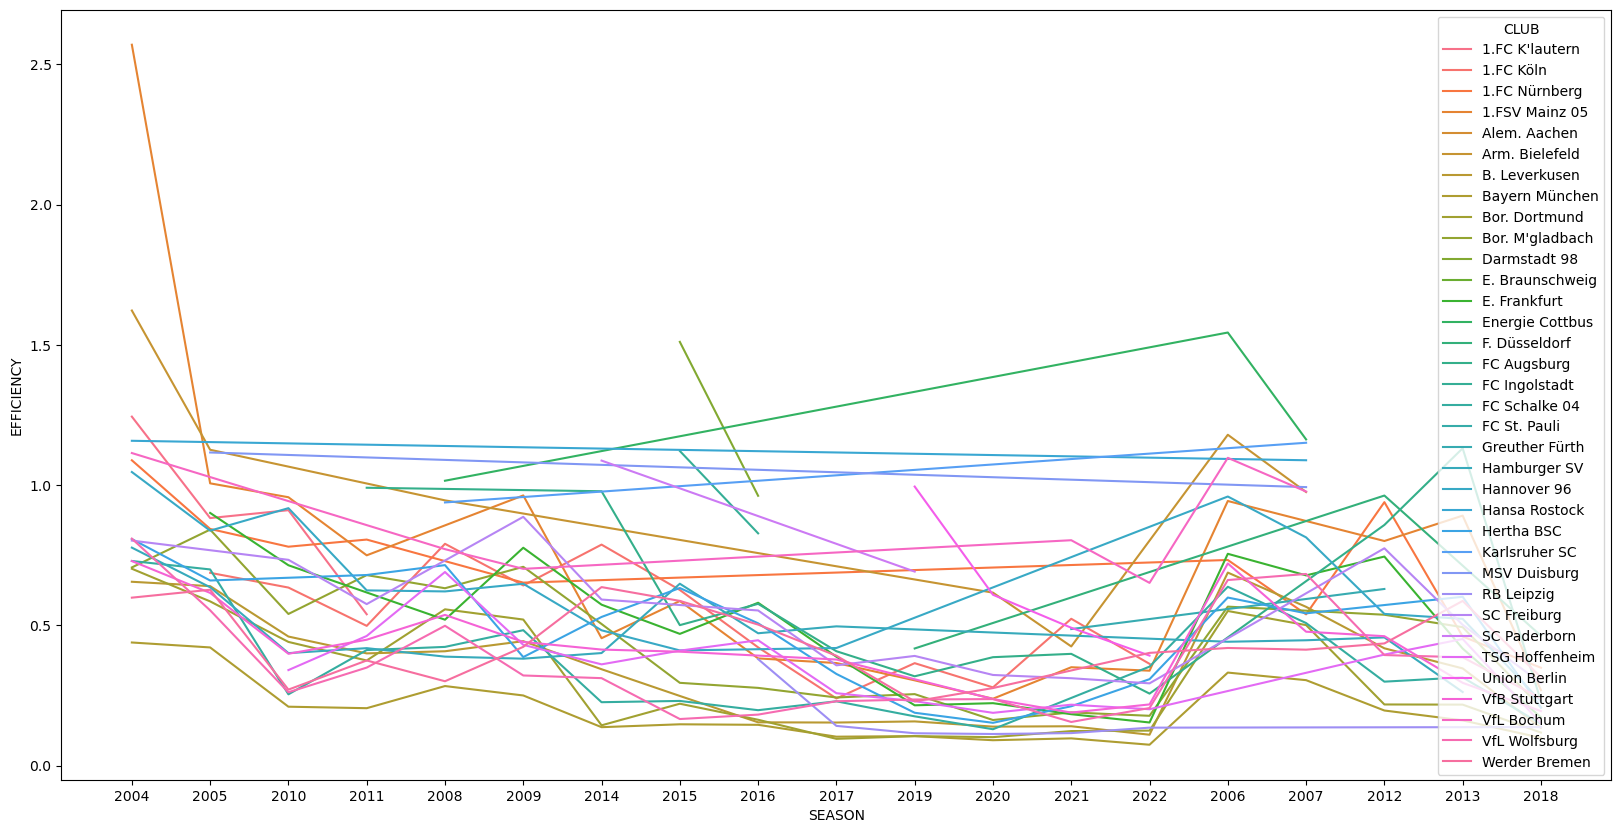

In [499]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.lineplot(x='SEASON', y='EFFICIENCY', hue='CLUB', data=efficiency_df)
plt.show()

## Group Match data by season

In [473]:
grouped_by_season = df_matchday.groupby('SEASON')
season_names = df_matchday['SEASON'].unique().tolist()

In [474]:
dict_match_season = {}
for season, group_df in grouped_by_season:
    dict_match_season[season] = group_df.reset_index(drop=True)

In [475]:
dict_match_season[season_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_POINTS,AWAY_POINTS
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,3,0
1,2004-08-07,5,8,2004,1,1.FC K'lautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner,0,3
2,2004-08-07,5,8,2004,1,SC Freiburg,18,Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer,1,1
3,2004-08-07,5,8,2004,1,Bor. Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark,0,3
4,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2005-05-21,5,5,2004,34,B. Leverkusen,6,Bor. M'gladbach,15,NaN,NaN,NaN,5.0,1.0,HOME_WIN,Thorsten Kinhöfer,3,0
302,2005-05-21,5,5,2004,34,Arm. Bielefeld,13,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Lutz-Michael Fröhlich,0,3
303,2005-05-21,5,5,2004,34,Bor. Dortmund,7,Hansa Rostock,17,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Uwe Kemmling,3,0
304,2005-05-21,5,5,2004,34,SC Freiburg,18,FC Schalke 04,2,NaN,NaN,NaN,2.0,3.0,AWAY_WIN,Michael Weiner,0,3


## Group Match data by season and home team

In [476]:
grouped_by_home_team= df_matchday.groupby('SEASON')
season_names = df_matchday['SEASON'].unique().tolist()

## Group Match data by season and away team

## Group Match data by referee

In [477]:
grouped_by_ref = df_matchday.groupby('REFEREE')
ref_names = df_matchday['REFEREE'].unique().tolist()
print(f'Number of referees: {len(ref_names)}')

Number of referees: 57


In [478]:
dict_of_refs = {}

for ref_name, group_df in grouped_by_ref:
    dict_of_refs[ref_name] = group_df.reset_index(drop=True)

In [479]:
dict_of_refs[ref_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_POINTS,AWAY_POINTS
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,3,0
1,2004-09-11,5,9,2004,4,1.FC Nürnberg,7,Hertha BSC,13,NaN,NaN,NaN,0.0,0.0,DRAW,Stefan Trautmann,1,1
2,2004-10-03,6,10,2004,7,Arm. Bielefeld,6,VfB Stuttgart,2,NaN,NaN,NaN,0.0,2.0,AWAY_WIN,Stefan Trautmann,0,3
3,2004-10-26,1,10,2004,10,Bayern München,3,VfL Wolfsburg,1,NaN,NaN,NaN,2.0,0.0,HOME_WIN,Stefan Trautmann,3,0
4,2004-11-07,6,11,2004,12,Hamburger SV,13,FC Schalke 04,2,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Stefan Trautmann,0,3
5,2004-11-13,5,11,2004,13,SC Freiburg,17,Arm. Bielefeld,9,NaN,NaN,NaN,2.0,3.0,AWAY_WIN,Stefan Trautmann,0,3
6,2004-11-27,5,11,2004,15,VfL Bochum,16,1.FC Nürnberg,12,NaN,NaN,NaN,3.0,1.0,HOME_WIN,Stefan Trautmann,3,0
7,2004-12-11,5,12,2004,17,Hannover 96,4,Hertha BSC,7,NaN,NaN,NaN,0.0,1.0,AWAY_WIN,Stefan Trautmann,0,3
8,2005-01-29,5,1,2004,19,1.FC K'lautern,10,FC Schalke 04,2,NaN,NaN,NaN,2.0,0.0,HOME_WIN,Stefan Trautmann,3,0
9,2005-02-05,5,2,2004,20,VfL Bochum,16,Arm. Bielefeld,12,NaN,NaN,NaN,1.0,1.0,DRAW,Stefan Trautmann,1,1


### Number of games per referee and team

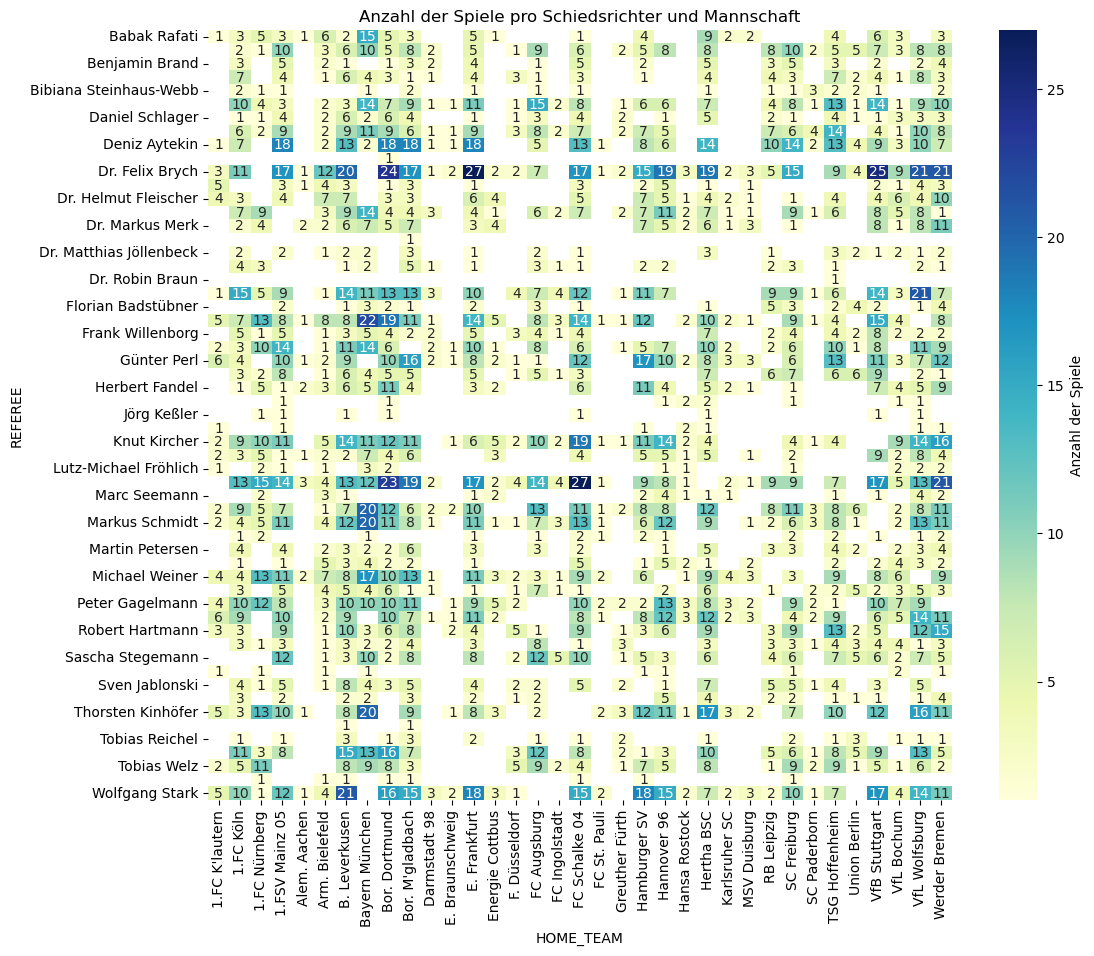

In [480]:
# Die Werte in der Pivot-Tabelle repräsentieren die Anzahl der Spiele, die von einem bestimmten Schiedsrichter für eine bestimmte Mannschaft gepfiffen wurden
pivot_table = df_matchday.pivot_table(index='REFEREE', columns='HOME_TEAM', values='DATE', aggfunc='count')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Anzahl der Spiele'})
plt.title("Anzahl der Spiele pro Schiedsrichter und Mannschaft")
plt.show()

### Average results by team and referee

In [481]:
# Markiere die Ergebnisse für 1 Heimsieg, - 1 Auswärtssieg (verloren) und 0 für unentschieden
df_matchday = df_matchday.copy()
df_matchday['RESULT_VALUE'] = np.where(df_matchday['HOME_GOALS'] > df_matchday['AWAY_GOALS'], 1,  # Heimsieg
                                      np.where(df_matchday['HOME_GOALS'] < df_matchday['AWAY_GOALS'], -1, 0))  # Auswärtssieg bzw. Unentschieden


In [482]:
home_results = df_matchday.groupby(['HOME_TEAM', 'REFEREE'])['RESULT_VALUE'].mean().reset_index().rename(columns={'HOME_TEAM': 'TEAM'})
away_results = df_matchday.groupby(['AWAY_TEAM', 'REFEREE'])['RESULT_VALUE'].mean().reset_index().rename(columns={'AWAY_TEAM': 'TEAM'})
#
combined_results = pd.concat([home_results, away_results])

In [483]:
pivot_df = combined_results.pivot_table(index='TEAM', columns='REFEREE', values='RESULT_VALUE', aggfunc='mean').fillna(0)

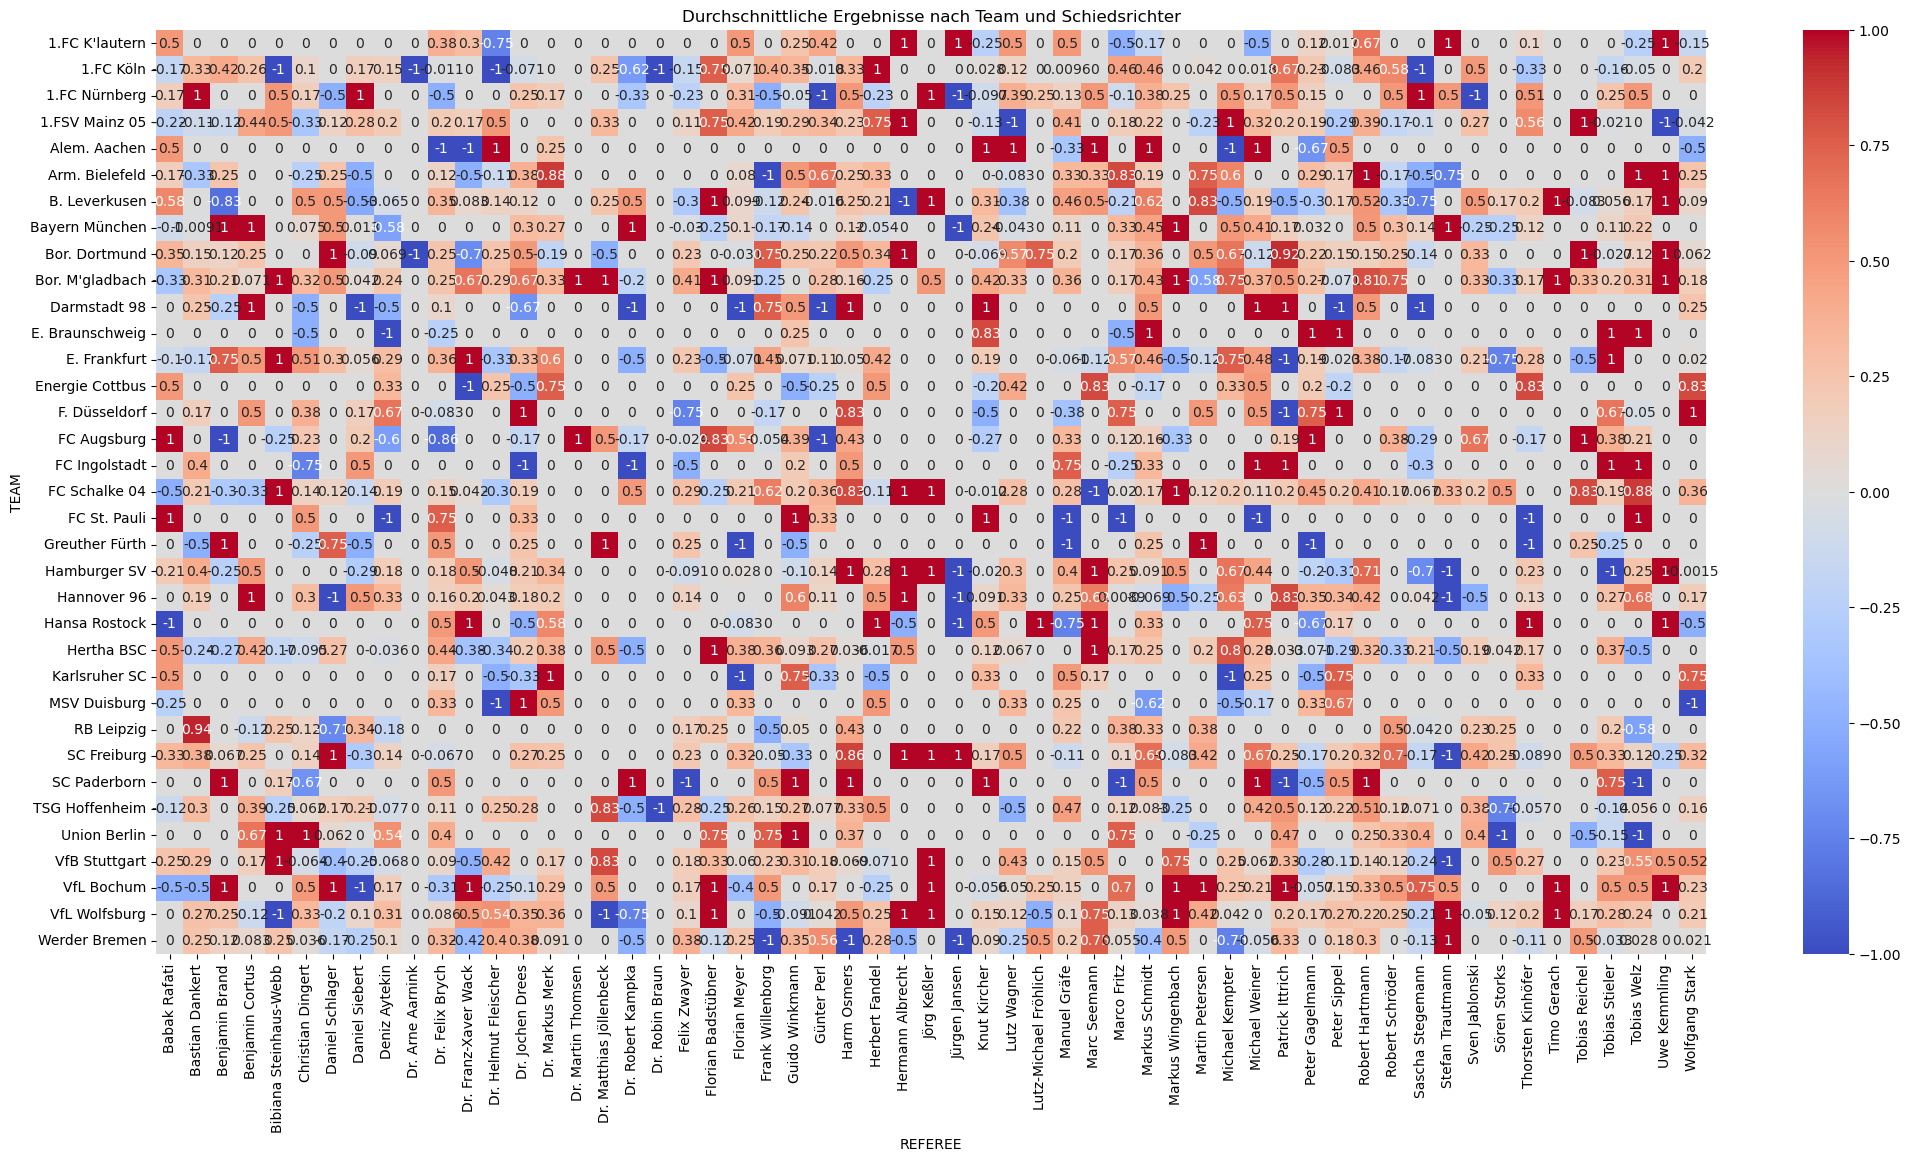

In [484]:
# Die Werte in der Pivot-Tabelle repräsentieren die durchschnittliche Ergebnisse (1: Sieg, 0: ausgegelichen, -1: Niederlage) von einem bestimmten Schiedsrichter für eine bestimmte Mannschaft
plt.figure(figsize=(25, 12))
sns.heatmap(pivot_df, cmap="coolwarm", center=0, annot=True)
plt.title('Durchschnittliche Ergebnisse nach Team und Schiedsrichter')
plt.show()

## Include Typing Trends in Analysis

In [485]:
df_matchday_no_na = df_matchday.dropna()

In [486]:
def predict_result(row):
    # if row['WIN_PERC_HOME'] > 50:
    #     return 'HOME_WIN'
    # elif row['WIN_PERC_AWAY'] > 50:
    #     return 'AWAY_WIN'
    # elif row['REMIS_PERC'] > 50:
    #     return 'DRAW'
    # else:
    # Wenn keine der Schwellenwerte erfüllt ist, nimm den höchsten Prozentsatz
    max_value = max(row['WIN_PERC_HOME'], row['WIN_PERC_AWAY'], row['REMIS_PERC'])
    if max_value == row['WIN_PERC_HOME']:
        return 'HOME_WIN'
    elif max_value == row['WIN_PERC_AWAY']:
        return 'AWAY_WIN'
    else:
        return 'DRAW'

df_matchday['PREDICTED_RESULT'] = df_matchday.apply(predict_result, axis=1)
df_matchday['CORRECT_PREDICTION'] = df_matchday['PREDICTED_RESULT'] == df_matchday['RESULT']

In [487]:
# Für Heimsiege
home_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'HOME_WIN']
correct_home_predictions = home_predictions[home_predictions['CORRECT_PREDICTION']].shape[0]
home_accuracy = (correct_home_predictions / home_predictions.shape[0]) * 100

# Für Unentschieden
draw_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'DRAW']
correct_draw_predictions = draw_predictions[draw_predictions['CORRECT_PREDICTION']].shape[0]
draw_accuracy = (correct_draw_predictions / draw_predictions.shape[0]) * 100

# Für Auswärtssiege
away_predictions = df_matchday[df_matchday['PREDICTED_RESULT'] == 'AWAY_WIN']
correct_away_predictions = away_predictions[away_predictions['CORRECT_PREDICTION']].shape[0]
away_accuracy = (correct_away_predictions / away_predictions.shape[0]) * 100

print(f'Accuracy for home win predictions: {home_accuracy:.2f}%')
print(f'Accuracy for draw predictions: {draw_accuracy:.2f}%')
print(f'Accuracy for away win predictions: {away_accuracy:.2f}%')


Accuracy for home win predictions: 54.23%
Accuracy for draw predictions: 25.84%
Accuracy for away win predictions: 46.90%


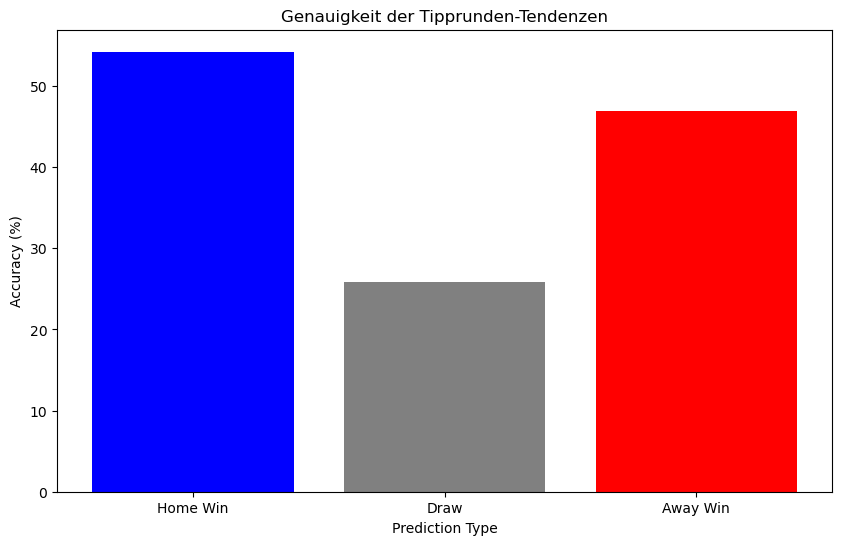

In [488]:
# Genauigkeitswerte
accuracies = [home_accuracy, draw_accuracy, away_accuracy]

# Bezeichnungen für die Balken
labels = ['Home Win', 'Draw', 'Away Win']

# Erstellen des Balkendiagramm
plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'gray', 'red'])

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Genauigkeit der Tipprunden-Tendenzen')
plt.xlabel('Prediction Type')
plt.ylabel('Accuracy (%)')

plt.show()

## Group Match data by results

In [489]:
grouped_by_results = df_matchday.groupby('RESULT')
result_names = df_matchday['RESULT'].unique().tolist()

In [490]:
dict_of_results = {}

for result_name, group_df in grouped_by_results:
    dict_of_results[result_name] = group_df.reset_index(drop=True)

In [491]:
dict_of_results[result_names[0]]

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,...,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_POINTS,AWAY_POINTS,RESULT_VALUE,PREDICTED_RESULT,CORRECT_PREDICTION
0,2004-08-06,4,8,2004,1,Werder Bremen,3,FC Schalke 04,2,NaN,...,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,3,0,1,DRAW,False
1,2004-08-07,5,8,2004,1,B. Leverkusen,6,Hannover 96,10,NaN,...,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,3,0,1,DRAW,False
2,2004-08-08,6,8,2004,1,VfB Stuttgart,5,1.FSV Mainz 05,11,NaN,...,NaN,4.0,2.0,HOME_WIN,Florian Meyer,3,0,1,DRAW,False
3,2004-08-14,5,8,2004,2,1.FSV Mainz 05,16,Hamburger SV,18,NaN,...,NaN,2.0,1.0,HOME_WIN,Hermann Albrecht,3,0,1,DRAW,False
4,2004-08-14,5,8,2004,2,FC Schalke 04,15,1.FC K'lautern,17,NaN,...,NaN,2.0,1.0,HOME_WIN,Peter Sippel,3,0,1,DRAW,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,2023-05-27,5,5,2022,34,RB Leipzig,3,FC Schalke 04,17,83.5,...,8.7,4.0,2.0,HOME_WIN,Harm Osmers,3,0,1,HOME_WIN,True
2627,2023-05-27,5,5,2022,34,Union Berlin,4,Werder Bremen,12,86.8,...,3.2,1.0,0.0,HOME_WIN,Patrick Ittrich,3,0,1,HOME_WIN,True
2628,2023-05-27,5,5,2022,34,Bor. M'gladbach,11,FC Augsburg,14,68.9,...,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck,3,0,1,HOME_WIN,True
2629,2023-05-27,5,5,2022,34,E. Frankfurt,8,SC Freiburg,5,31.4,...,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin,3,0,1,DRAW,False


# Transfer data

In [492]:
df_transfer_data

,CLUB_NAME,AVG_AGE_JOINING,AVG_AGE_LEAVING,TOTAL_VALUE_JOINING_MIO,TOTAL_VALUE_LEAVING_MIO,EXPENSES_JOINING_MIO,REVENUE_LEAVING_MIO,season
0,1.FC Saarbrücken,22.8,25.2,,,,,1963
1,1.FC Kaiserslautern,22.8,24.2,,,0.06,,1963
2,1.FC Köln,18.0,24.3,,,,0.25,1963
3,1.FC Nürnberg,24.0,21.5,,,0.025,,1963
4,Borussia Dortmund,22.8,29.3,,,,0.115,1963
...,...,...,...,...,...,...,...,...
13,FC Augsburg,22.6,24.6,69.2,39.5,11.45,6.8,2022
14,VfB Stuttgart,22.8,22.8,72.75,99.9,14.99,52.6,2022
15,Hertha BSC,23.7,24.4,84.83,80.78,8.55,24.25,2022
16,FC Schalke 04,24.7,24.6,90.15,89.85,8.63,21.35,2022


In [500]:
df_transfer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 17
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLUB_NAME                1078 non-null   object 
 1   AVG_AGE_JOINING          1078 non-null   float64
 2   AVG_AGE_LEAVING          1078 non-null   object 
 3   TOTAL_VALUE_JOINING_MIO  1078 non-null   object 
 4   TOTAL_VALUE_LEAVING_MIO  1078 non-null   object 
 5   EXPENSES_JOINING_MIO     1078 non-null   object 
 6   REVENUE_LEAVING_MIO      1078 non-null   object 
 7   season                   1078 non-null   object 
dtypes: float64(1), object(7)
memory usage: 75.8+ KB


In [501]:
grouped_by_club = df_transfer_data.groupby('CLUB_NAME')
club_names = df_transfer_data['CLUB_NAME'].unique().tolist()

In [502]:
dict_of_clubs = {}
for club_name, group_df in grouped_by_club:
    dict_of_clubs[club_name] = group_df.reset_index(drop=True)

In [503]:
# bayern_df = dict_of_clubs['FC Bayern München']
club_df = dict_of_clubs[club_names[4]]

In [504]:
club_df

,CLUB_NAME,AVG_AGE_JOINING,AVG_AGE_LEAVING,TOTAL_VALUE_JOINING_MIO,TOTAL_VALUE_LEAVING_MIO,EXPENSES_JOINING_MIO,REVENUE_LEAVING_MIO,season
0,Borussia Dortmund,22.8,29.3,,,,0.115,1963
1,Borussia Dortmund,22.0,28.0,,,,,1964
2,Borussia Dortmund,21.3,30.7,,,0.05,0.04,1965
3,Borussia Dortmund,22.8,25.5,,,,,1966
4,Borussia Dortmund,19.5,28.0,,,,0.065,1967
5,Borussia Dortmund,23.0,25.8,,,,,1968
6,Borussia Dortmund,22.2,25.9,,,0.05,0.089,1969
7,Borussia Dortmund,20.8,24.8,,,,0.05,1970
8,Borussia Dortmund,22.1,26.5,,,,,1971
9,Borussia Dortmund,25.9,25.7,,,0.765,,1976
